In [1]:
import re
import os
import glob
import argparse
import cv2
import matplotlib.pyplot as plt
import shutil
import numpy as np
%matplotlib inline

ypath='./yolo_format'
tpath = './dummy'
ratio = 0.25

img_path = ypath + '/images'
label_path = ypath + '/labels'

# label mapping is optional
label_dict = {"0": "bird", "1": "flatwing", "2": "quadcopter"}

In [2]:
!cat ./yolo_format/labels/frame_000000.txt

0 0.0143 0.2799 0.0283 0.0504
0 0.0467 0.3797 0.0409 0.0564
2 0.1238 0.4332 0.0476 0.0625
2 0.6733 0.5037 0.0488 0.0585
1 0.616 0.531 0.0522 0.0605
1 0.9267 0.788 0.0589 0.0625


In [3]:
for k,v in label_dict.items():
    train_path = tpath + '/train/' + v
    test_path = tpath + '/test/' + v

    if not os.path.exists(train_path):
        os.makedirs(train_path)
    if not os.path.exists(test_path):
        os.makedirs(test_path)

In [4]:
def yolotxt(t):
    """
    convert a yolo formatted line to coordinate floats 
    """
    t0 = t.split()
    cls = t0[0]
    t1 = [float(i) for i in t0[1:]]
    xmin, ymin = t1[0] - 0.5 * t1[2], t1[1] - 0.5 * t1[3]
    xmax, ymax = xmin + t1[2], ymin + t1[3]
    return cls, xmin, ymin, xmax, ymax

Get the coordinate of each bounding box and crop the respective image and save it under the respective class. Additionally split the data into test and train

0 files created


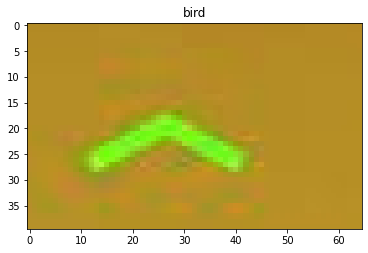

5000 files created


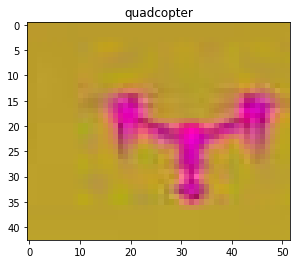

10000 files created


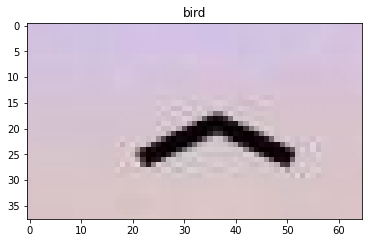

15000 files created


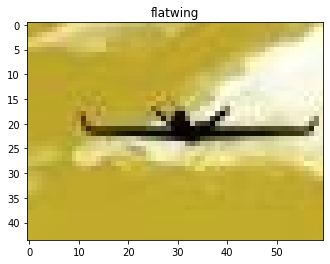

20000 files created


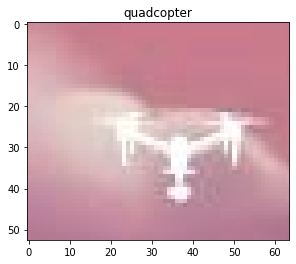

In [7]:
count = 0

for filename in glob.glob(label_path + '/*.txt'):
    basename = os.path.basename(filename)
    basename_no_ext, extension = (os.path.splitext(basename)[i] for i in [0, 1])

    labelfile=open(filename,'r')
    lines=labelfile.readlines()

    for line in lines:

        img = cv2.imread(img_path + '/' + basename_no_ext + '.jpg')
        dh, dw, _ = img.shape

        cls, xmin, ymin, xmax, ymax = yolotxt(line)
        xmin = max(int(xmin * dw), 0)
        xmax = max(int(xmax * dw), 0)
        ymin = max(int(ymin * dh), 0)
        ymax = max(int(ymax * dh), 0)

        crop_img = img[ymin:ymax, xmin:xmax]

        if np.random.rand(1) < ratio:
            dir = '/test/'
        else:
            dir = '/train/'

        
        img_out = tpath + dir + label_dict[cls] + '/' + label_dict[cls] + basename_no_ext + '.jpg'

        cv2.imwrite(img_out, crop_img)
        
        if count % 5000 == 0:
            print(f'{count} files created')
            
            plt.imshow(crop_img)
            plt.title(label_dict[cls])
            plt.show()
        
        count += 1